<a href="https://colab.research.google.com/github/henry5250/DS-4002/blob/main/hotdog_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing necessary packages to wrangle data and run EDA
import pandas as pd
import numpy as np
#Visualization tools
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
hotdogdata= pd.read_excel("https://github.com/gatesz33/DS-4002/raw/refs/heads/main/hot-dog-survey-data/fa25/Is%20hotdog%20a%20sandwich_%20(Responses).xlsx")

In [ ]:
hotdogdata.head()

,Timestamp,Year,Response
0,2025-08-29 17:17:56.622,4,Yes
1,2025-08-29 18:33:07.653,3,Yes
2,2025-08-29 18:33:08.405,4,Yes
3,2025-08-29 18:33:28.632,3,Yes
4,2025-08-29 18:33:41.234,1,No


In [ ]:
#Cross tabulation to see the breakdown in responses by year at UVA
counts = pd.crosstab(hotdogdata['Year'], hotdogdata['Response'])
print(counts)

Response  No  Yes
Year             
1          8    0
2         30   10
3         34   11
4         78   36


/tmp/ipython-input-3812526376.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Response', data=hotdogdata, palette=['green','red'])


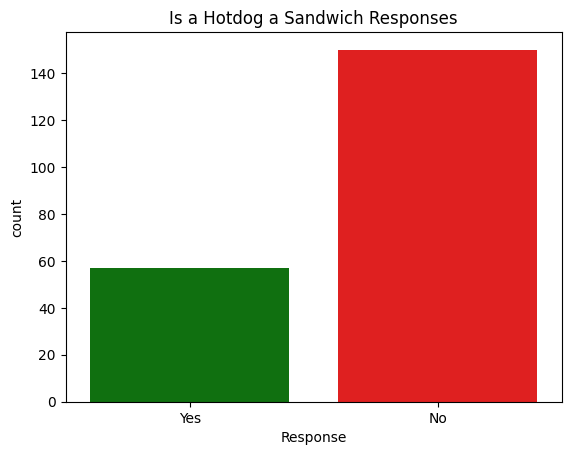

In [ ]:
#Bar chart showing the simple yes/no breakdown of survey responses
sns.countplot(x='Response', data=hotdogdata, palette=['green','red'])
plt.title('Is a Hotdog a Sandwich Responses')
plt.show()

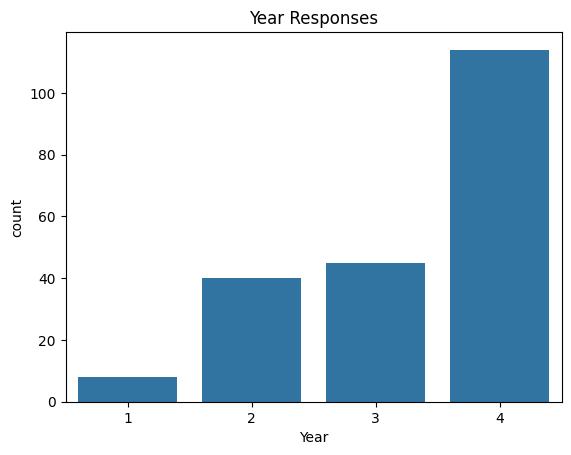

In [ ]:
#Bar chart showing the simple yes/no breakdown of survey responses
sns.countplot(x='Year', data=hotdogdata)
plt.title('Year Responses')
plt.show()

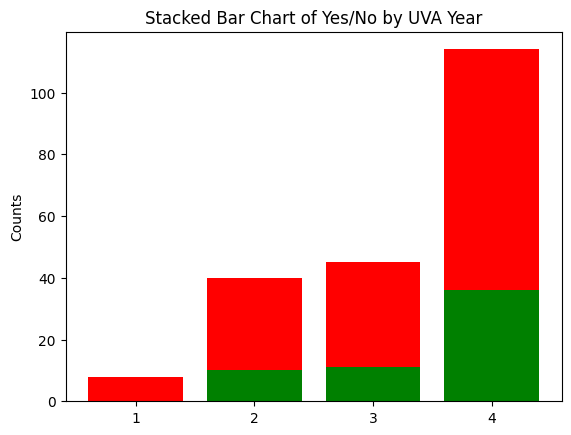

In [ ]:
#Stacked bar chart of responses per year
years = ['1', '2', '3','4']
yes = [0,10,11,36]
no = [8,30,34,78]

x = np.arange(len(years))
plt.bar(x, yes, label='Yes', color='green')
plt.bar(x, no, bottom=yes, label='No', color='red')  # stacked on top
plt.ylabel('Counts')
plt.xticks(x,years)
plt.title('Stacked Bar Chart of Yes/No by UVA Year')
plt.show()

In [ ]:
# Extract the hour from the 'Timestamp' column
hotdogdata['Hour'] = pd.to_datetime(hotdogdata['Timestamp']).dt.hour

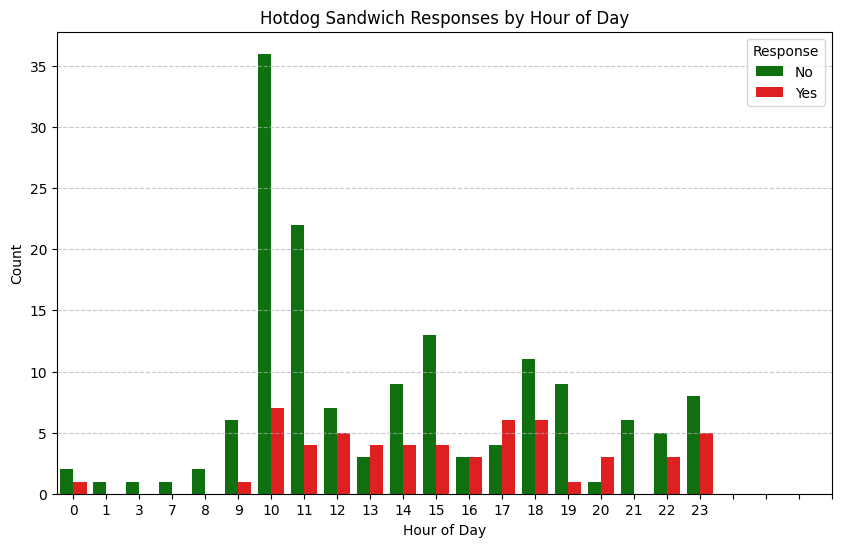

In [ ]:
#TIME V
#Create a countplot of 'Response' by 'Hour'
plt.figure(figsize=(10, 6))
sns.countplot(x='Hour', hue='Response', data=hotdogdata, palette=['green', 'red'])
plt.title('Hotdog Sandwich Responses by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.xticks(np.arange(24)) # Ensure all hours are shown on x-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

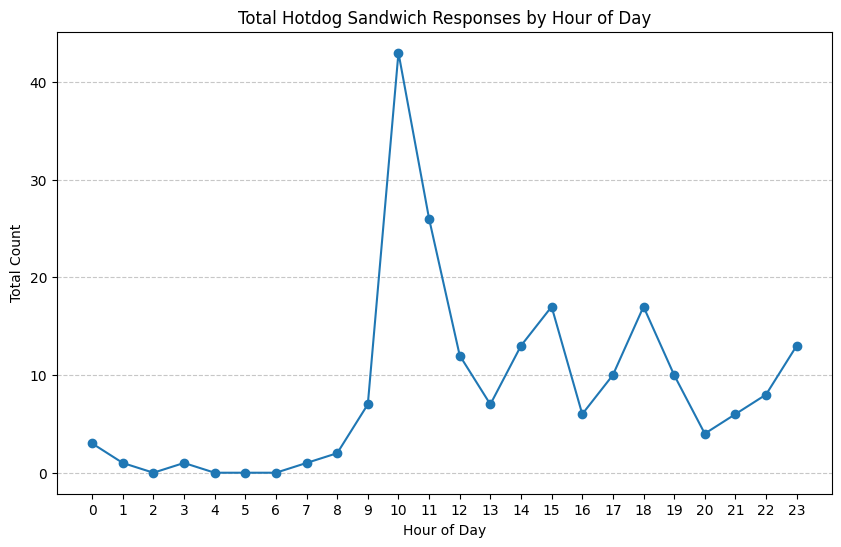

In [ ]:
#TIME GRAPH
#Group by hour and count the total responses
hourly_counts = hotdogdata['Hour'].value_counts().sort_index()

#Reindex to include all hours from 0 to 23 and fill missing values with 0
hourly_counts = hourly_counts.reindex(range(24), fill_value=0)

#Create a line plot of total responses by hour
plt.figure(figsize=(10, 6))
plt.plot(hourly_counts.index, hourly_counts.values, marker='o')
plt.title('Total Hotdog Sandwich Responses by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Total Count')
plt.xticks(np.arange(24))  #every hour
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

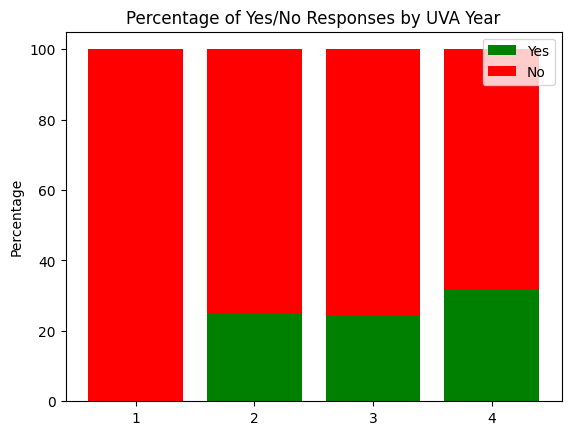

In [ ]:
# Calculate percentages for stacked bar chart
counts_percent = counts.apply(lambda x: x / x.sum() * 100, axis=1)

# Stacked bar chart of percentages of responses per year
years = counts_percent.index
yes_percent = counts_percent['Yes']
no_percent = counts_percent['No']

x = np.arange(len(years))
plt.bar(x, yes_percent, label='Yes', color='green')
plt.bar(x, no_percent, bottom=yes_percent, label='No', color='red')  # stacked on top
plt.ylabel('Percentage')
plt.xticks(x, years)
plt.title('Percentage of Yes/No Responses by UVA Year')
plt.legend()
plt.show()